### INSTALL & LIBRARY

#### Install machine learning extensions

In [1]:
#pip install mlxtend 

**Import library**

In [33]:
import pandas as pd
import numpy as np
import requests 
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from datetime import datetime, timedelta
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


pd.options.mode.chained_assignment = None  # default='warn'

### CONVERT DATAFRAME TO CSV

#### Data Frame Traffic

In [3]:
df_traffic_load = pd.read_csv('traffic_accident_final.csv')
df_traffic_load['date_time'] = pd.to_datetime(df_traffic_load['date_time'])

In [4]:
df_traffic_load.drop(['id_str','full_text'], axis=1, inplace=True)
df_traffic_load

,date_time
0,2020-01-01 00:00:00
1,2020-01-01 00:00:00
2,2020-01-01 00:00:00
3,2020-01-01 00:00:00
4,2020-01-01 00:00:00
...,...
41623,2020-03-31 23:00:00
41624,2020-03-31 23:00:00
41625,2020-03-31 23:00:00
41626,2020-03-31 23:00:00


#### Menghitung Jumlah Row Tiap Value

In [5]:
df_traffic_load.value_counts()

date_time          
2020-01-27 06:00:00    227
2020-01-27 08:00:00    221
2020-01-27 10:00:00    203
2020-01-27 07:00:00    185
2020-01-27 09:00:00    181
                      ... 
2020-03-26 02:00:00      1
2020-02-25 04:00:00      1
2020-03-28 03:00:00      1
2020-03-27 01:00:00      1
2020-02-24 01:00:00      1
Length: 2183, dtype: int64

In [6]:
df = df_traffic_load.groupby('date_time', as_index=False).value_counts()
df

,date_time,count
0,2020-01-01 00:00:00,16
1,2020-01-01 01:00:00,17
2,2020-01-01 02:00:00,11
3,2020-01-01 03:00:00,13
4,2020-01-01 04:00:00,5
...,...,...
2178,2020-03-31 19:00:00,33
2179,2020-03-31 20:00:00,18
2180,2020-03-31 21:00:00,21
2181,2020-03-31 22:00:00,19


#### Roll Up pada Column count Menjadi impact Berdasarkan Klasifikasi Nilai count

In [7]:
range = []
for row in df['count']:
    if row > 50.0 : range.append('Critical')
    elif row > 20.0 : range.append('Significant')
    elif row > 5.0 : range.append('Considerable')
    elif row > 0 or np.nan: range.append('No or Low')

df['count'] = range

df.rename(columns = {'count':'impact'}, inplace = True)

In [8]:
df

,date_time,impact
0,2020-01-01 00:00:00,Considerable
1,2020-01-01 01:00:00,Considerable
2,2020-01-01 02:00:00,Considerable
3,2020-01-01 03:00:00,Considerable
4,2020-01-01 04:00:00,No or Low
...,...,...
2178,2020-03-31 19:00:00,Significant
2179,2020-03-31 20:00:00,Considerable
2180,2020-03-31 21:00:00,Significant
2181,2020-03-31 22:00:00,Considerable


#### Menghitung Jumlah Row Tiap Value impact

In [9]:
df['impact'].value_counts()

Considerable    1160
Significant      731
No or Low        232
Critical          60
Name: impact, dtype: int64

#### Data Frame Weather

In [10]:
df_weather_load = pd.read_csv('weather.csv')

In [11]:
df_weather_load['date_time'] = pd.to_datetime(df_weather_load['date_time'])
df_weather_load

,date_time,weatherValue
0,2020-01-01 00:00:00,Torrential rain shower
1,2020-01-01 01:00:00,Torrential rain shower
2,2020-01-01 02:00:00,Heavy rain
3,2020-01-01 03:00:00,Heavy rain
4,2020-01-01 04:00:00,Heavy rain
...,...,...
2155,2020-03-30 19:00:00,Patchy rain possible
2156,2020-03-30 20:00:00,Torrential rain shower
2157,2020-03-30 21:00:00,Torrential rain shower
2158,2020-03-30 22:00:00,Torrential rain shower


#### Roll Up pada Column weatherValue Berdasarkan Klasifikasi Cuaca

In [12]:
df_weather_load.weatherValue.unique()

array(['Torrential rain shower', 'Heavy rain',
       'Moderate or heavy rain shower', 'Light rain',
       'Patchy light drizzle', 'Light rain shower', 'Partly cloudy',
       'Patchy rain possible', 'Cloudy', 'Patchy light rain',
       'Heavy rain at times', 'Overcast', 'Moderate rain',
       'Moderate rain at times', 'Light drizzle'], dtype=object)

In [13]:
df_weather = df_weather_load.copy()
range = []
for row in df_weather['weatherValue']:
    if row == 'Light rain shower' : range.append('Light rain')
    elif row == 'Patchy light rain' : range.append('Light rain')
    elif row == 'Patchy light drizzle' : range.append('Light rain')
    elif row == 'Moderate or heavy rain shower' : range.append('Moderate rain')
    elif row == 'Moderate rain at times' : range.append('Moderate rain')
    elif row == 'Heavy rain at times' : range.append('Heavy rain')
    elif row == 'Torrential rain shower' : range.append('Heavy rain')
    elif row == 'Partly cloudy' : range.append('Sunny')
    elif row == 'Cloudy' : range.append('Overcast')
    elif row or np.nan == 'Patchy rain possible' : range.append('Moderate rain')

df_weather ['weatherValue'] = range
df_weather

,date_time,weatherValue
0,2020-01-01 00:00:00,Heavy rain
1,2020-01-01 01:00:00,Heavy rain
2,2020-01-01 02:00:00,Moderate rain
3,2020-01-01 03:00:00,Moderate rain
4,2020-01-01 04:00:00,Moderate rain
...,...,...
2155,2020-03-30 19:00:00,Moderate rain
2156,2020-03-30 20:00:00,Heavy rain
2157,2020-03-30 21:00:00,Heavy rain
2158,2020-03-30 22:00:00,Heavy rain


#### Mengecek Jumlah Data Kosong

In [14]:
df.isnull().sum()

date_time    0
impact       0
dtype: int64

### VISUALISASI DATA CUBE

#### Import Atoti

In [15]:
import atoti as tt

Welcome to atoti 0.7.1!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, set the ATOTI_DISABLE_TELEMETRY environment variable to True.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


In [16]:
session = tt.Session()

#### Data Frame Traffic

In [17]:
ttTraffic = session.read_pandas(df,
                              keys=["date_time","impact"],
                              table_name="table_Traffic")

In [18]:
ttTraffic.head()

,
date_time,impact
2020-01-01 00:00:00,Considerable
2020-01-01 07:00:00,Considerable
2020-01-01 12:00:00,Considerable
2020-01-01 16:00:00,Considerable
2020-01-02 15:00:00,Significant


#### Data Frame Weather

In [19]:
ttWeather = session.read_pandas(df_weather,
                              keys=["date_time","weatherValue"],
                              table_name="table_Weather")

In [20]:
ttWeather.head()

,
date_time,weatherValue
2020-01-01 00:00:00,Heavy rain
2020-01-01 12:00:00,Heavy rain
2020-01-01 16:00:00,Heavy rain
2020-01-01 23:00:00,Moderate rain
2020-01-02 15:00:00,Light rain


#### Membuat Data Cube dengan Menggabungkan Dua Data Frame

In [21]:
ttWeather.join(ttTraffic, mapping={'date_time': 'date_time'})
cube1 = session.create_cube(ttWeather)

h, l, m = cube1.hierarchies, cube1.levels, cube1.measures

#### Menampilkan Data Cube

In [22]:
cube1

Cube(_name='table_Weather', _hierarchies=Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of ...>, _cube_name='table_Weather'), _measures=Measures())

#### Menampilkan Hierarki

In [23]:
h

Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of Cube(_name='table_Weather', _hierarchies=..., _measures=Measures())>, _cube_name='table_Weather')

#### Menampilkan Levels

In [24]:
l

Levels()

#### Menampilkan Measures

In [25]:
m

Measures()

#### Visualisasi Data

In [26]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [27]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### MACHINE LEARNING

#### Merge Dua Data Frame

In [28]:
df_merge = pd.merge(df, df_weather_load, left_on='date_time', right_on='date_time')

In [29]:
df_merge

,date_time,impact,weatherValue
0,2020-01-01 00:00:00,Considerable,Torrential rain shower
1,2020-01-01 01:00:00,Considerable,Torrential rain shower
2,2020-01-01 02:00:00,Considerable,Heavy rain
3,2020-01-01 03:00:00,Considerable,Heavy rain
4,2020-01-01 04:00:00,No or Low,Heavy rain
...,...,...,...
2154,2020-03-30 19:00:00,Considerable,Patchy rain possible
2155,2020-03-30 20:00:00,Significant,Torrential rain shower
2156,2020-03-30 21:00:00,Considerable,Torrential rain shower
2157,2020-03-30 22:00:00,Considerable,Torrential rain shower


#### Mengecek Jumlah Data Kosong

In [30]:
df_merge.isna().sum()

date_time       0
impact          0
weatherValue    0
dtype: int64

### Visualisasi dengan Regresi

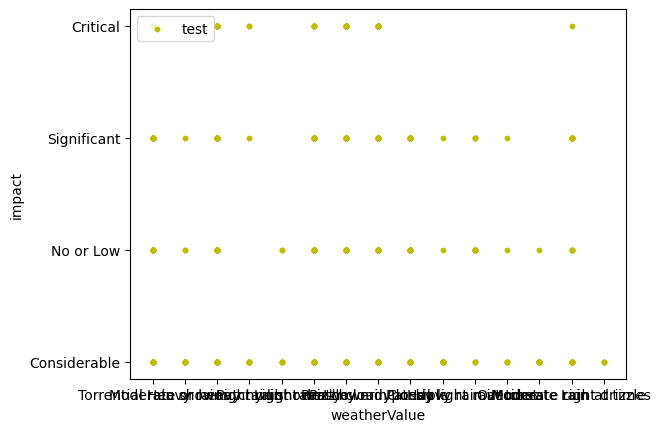

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.xlabel('weatherValue') 
plt.ylabel('impact') 

ax1.scatter(df_merge['weatherValue'], df_merge['impact'], s=10, c='y', marker="o", label='test')
plt.legend(loc='upper left')
plt.show()

In [34]:
X = np.array(df_merge['weatherValue']).reshape(-1, 1)
y = np.array(df_merge['impact']).reshape(-1, 1)
  
# # Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

ValueError: could not convert string to float: 'Light rain shower'

In [ ]:
X_test

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

#### Melakukan Association Rule Mining dengan Algoritma Apriori dan Library mlextend

In [ ]:
df_filter = pd.pivot_table(df_merge, values=['impact'], index=['weatherValue'], columns=['date_time'], aggfunc=np.sum)

In [ ]:
df_filter

In [ ]:
del range

In [ ]:
itemsetList = []
dflist = df_filter.values.tolist()
dfindex = df_filter.index.tolist()

for i in range (len(df_filter)):
    currentList = [dflist[i][item] for item in range(len(dflist[i])) if not(pd.isnull(dflist[i][item])) == True]
    itemsetList.append(currentList)
    
# itemsetList

In [ ]:

cleanedList = [[] for _ in range(len(itemsetList))]

for i in range(len(itemsetList)):
    for item in itemsetList[i]:
        if item in cleanedList[i]:
            continue
        else:
            cleanedList[i].append(item)

# cleanedList   

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(cleanedList).transform(cleanedList)

In [ ]:
df_try = pd.DataFrame(te_ary, columns=te.columns_)
df_try

In [ ]:
frequent_itemsets = apriori(df_try, min_support=0.5, use_colnames=True)
frequent_itemsets.set_index(pd.Index(dfindex[:len(frequent_itemsets)]), inplace=True)

frequent_itemsets

In [ ]:
res = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
res.set_index(pd.Index(dfindex[:len(res)]), inplace=True)

res = res[['antecedents', 'consequents', 'support', 'confidence']]
res